 # STAT6289 Homework 2

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

In [2]:
batch_size = 32
num_classes = 10
num_predictions = 20


In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Change types of x_train and x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_train type:', type(y_test[0,0]))

y_train shape: (50000, 10)
y_train type: <class 'numpy.float32'>


## Problem (a)
Compare the accuracy of the convolutional neural network in the file `cifar10_cnn.py` on the cifar10 dataset to the accuracy of simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers of 512 rectified linear units each.

1. **Convolutional neural network**

In [5]:
cnn_10 = Sequential()
cnn_10.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_10.add(Activation('relu'))
cnn_10.add(Conv2D(32, (3, 3)))
cnn_10.add(Activation('relu'))
cnn_10.add(MaxPooling2D(pool_size=(2, 2)))
cnn_10.add(Dropout(0.25))

cnn_10.add(Conv2D(64, (3, 3), padding='same'))
cnn_10.add(Activation('relu'))
cnn_10.add(Conv2D(64, (3, 3)))
cnn_10.add(Activation('relu'))
cnn_10.add(MaxPooling2D(pool_size=(2, 2)))
cnn_10.add(Dropout(0.25))

cnn_10.add(Flatten())
cnn_10.add(Dense(512))
cnn_10.add(Activation('relu'))
cnn_10.add(Dropout(0.5))
cnn_10.add(Dense(num_classes))
cnn_10.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_10.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Not using data augmentation.')
cnn_history = cnn_10.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)




Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8028 - accuracy: 0.3358 - val_loss: 1.5960 - val_accuracy: 0.4269
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4902 - accuracy: 0.4601 - val_loss: 1.4835 - val_accuracy: 0.4734
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3564 - accuracy: 0.5122 - val_loss: 1.2850 - val_accuracy: 0.5459
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2623 - accuracy: 0.5505 - val_loss: 1.2282 - val_accuracy: 0.5686
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1829 - accuracy: 0.5831 - val_loss: 1.1072 - val_accuracy: 0.6155
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1171 - accuracy: 0.6059 - val_loss: 1.0420 - val_accuracy: 0.6341
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0649 - accuracy: 0.6230 - val

2. **Simple dense neural network with 4 hidden layer of 512 rectified linear units**

In [6]:
nn4 = Sequential()
nn4.add(Flatten())
# hidden layer 1
nn4.add(Dense(512))
nn4.add(Activation('relu'))
nn4.add(Dropout(0.5))
#hidden layer 2
nn4.add(Dense(512))
nn4.add(Activation('relu'))
nn4.add(Dropout(0.5))
# hidden layer 3
nn4.add(Dense(512))
nn4.add(Activation('relu'))
nn4.add(Dropout(0.5))
#hidden layer 4
nn4.add(Dense(512))
nn4.add(Activation('relu'))
nn4.add(Dropout(0.5))

nn4.add(Dense(num_classes))
nn4.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
nn4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


nn4_history = nn4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1910 - accuracy: 0.1651 - val_loss: 1.9887 - val_accuracy: 0.2559
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0120 - accuracy: 0.2468 - val_loss: 1.8775 - val_accuracy: 0.3295
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9502 - accuracy: 0.2802 - val_loss: 1.8529 - val_accuracy: 0.3288
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9131 - accuracy: 0.2957 - val_loss: 1.8487 - val_accuracy: 0.3481
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8855 - accuracy: 0.3096 - val_loss: 1.8230 - val_accuracy: 0.3533
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8610 - accuracy: 0.3204 - val_loss: 1.8309 - val_accuracy: 0.3570
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8580 - accuracy: 0.3234 - val_loss: 1.8049 - val_accuracy:

3. **Simple dense neural network with 3 hidden layer of 512 rectified linear units**

In [7]:
nn3 = Sequential()
nn3.add(Flatten())
# hidden layer 1
nn3.add(Dense(512))
nn3.add(Activation('relu'))
nn3.add(Dropout(0.5))
#hidden layer 2
nn3.add(Dense(512))
nn3.add(Activation('relu'))
nn3.add(Dropout(0.5))
# hidden layer 3
nn3.add(Dense(512))
nn3.add(Activation('relu'))
nn3.add(Dropout(0.5))

nn3.add(Dense(num_classes))
nn3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
nn3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Not using data augmentation.')
nn3_history = nn3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)



Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1364 - accuracy: 0.1984 - val_loss: 1.9140 - val_accuracy: 0.3023
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9624 - accuracy: 0.2768 - val_loss: 1.8249 - val_accuracy: 0.3469
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9035 - accuracy: 0.3090 - val_loss: 1.7810 - val_accuracy: 0.3728
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8639 - accuracy: 0.3253 - val_loss: 1.7730 - val_accuracy: 0.3747
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8396 - accuracy: 0.3361 - val_loss: 1.7955 - val_accuracy: 0.3504
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8135 - accuracy: 0.3495 - val_loss: 1.7081 - val_accuracy: 0.4093
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7990 - accuracy: 0.3509 - val

4. **Simple dense neural network with 2 hidden layers of 512 rectified linear units**

In [8]:
nn2 = Sequential()
nn2.add(Flatten())
# hidden layer 1
nn2.add(Dense(512))
nn2.add(Activation('relu'))
nn2.add(Dropout(0.5))
#hidden layer 2
nn2.add(Dense(512))
nn2.add(Activation('relu'))
nn2.add(Dropout(0.5))



nn2.add(Dense(num_classes))
nn2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
nn2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



print('Not using data augmentation.')
nn2_history = nn2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0612 - accuracy: 0.2453 - val_loss: 1.8296 - val_accuracy: 0.3490
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8941 - accuracy: 0.3145 - val_loss: 1.7441 - val_accuracy: 0.3816
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8333 - accuracy: 0.3414 - val_loss: 1.7096 - val_accuracy: 0.3924
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7917 - accuracy: 0.3583 - val_loss: 1.6519 - val_accuracy: 0.4155
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7671 - accuracy: 0.3716 - val_loss: 1.6308 - val_accuracy: 0.4304
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7491 - accuracy: 0.3784 - val_loss: 1.6517 - val_accuracy: 0.4188
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7334 - accuracy: 0.3864 - val

5. **Simple dense neural network with 1 hidden layer of 512 rectified linear units**

In [9]:
nn1 = Sequential()
nn1.add(Flatten())
# hidden layer 1
nn1.add(Dense(512))
nn1.add(Activation('relu'))
nn1.add(Dropout(0.5))



nn1.add(Dense(num_classes))
nn1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
nn1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Not using data augmentation.')
nn1_history = nn1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9728 - accuracy: 0.2886 - val_loss: 1.7687 - val_accuracy: 0.3822
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8130 - accuracy: 0.3541 - val_loss: 1.7112 - val_accuracy: 0.3889
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7572 - accuracy: 0.3737 - val_loss: 1.6640 - val_accuracy: 0.4140
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7153 - accuracy: 0.3903 - val_loss: 1.6193 - val_accuracy: 0.4264
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6892 - accuracy: 0.4040 - val_loss: 1.5863 - val_accuracy: 0.4456
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6635 - accuracy: 0.4111 - val_loss: 1.5732 - val_accuracy: 0.4435
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6408 - accuracy: 0.4192 - val

6. **Simple dense neural network with 0 hidden layer of 512 rectified linear units**

In [10]:
nn0 = Sequential()
nn0.add(Flatten())

nn0.add(Dense(num_classes))
nn0.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
nn0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])




print('Not using data augmentation.')
nn0_history = nn0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9784 - accuracy: 0.2987 - val_loss: 1.8780 - val_accuracy: 0.3453
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8471 - accuracy: 0.3534 - val_loss: 1.8308 - val_accuracy: 0.3570
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8137 - accuracy: 0.3680 - val_loss: 1.8036 - val_accuracy: 0.3696
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7925 - accuracy: 0.3762 - val_loss: 1.8144 - val_accuracy: 0.3603
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7793 - accuracy: 0.3836 - val_loss: 1.7979 - val_accuracy: 0.3786
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7684 - accuracy: 0.3878 - val_loss: 1.7818 - val_accuracy: 0.3747
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7604 - accuracy: 0.3923 - val

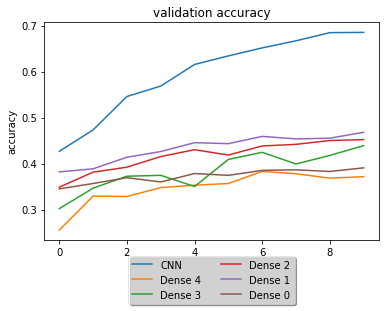

In [11]:
plt.plot(cnn_history.history['val_accuracy'], label=f"CNN")
plt.plot(nn4_history.history['val_accuracy'], label=f"Dense 4")
plt.plot(nn3_history.history['val_accuracy'], label=f"Dense 3")
plt.plot(nn2_history.history['val_accuracy'], label=f"Dense 2")
plt.plot(nn1_history.history['val_accuracy'], label=f"Dense 1")
plt.plot(nn0_history.history['val_accuracy'], label=f"Dense 0")
plt.title('validation accuracy')
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

It is obviously to see that convolutional neural network outperforms the other simple dense nueural network, in the sense that convolutional neural network shows more than 60% of accuracy for the first 10 epochs while the accuracy of neural networks are around 30% for the first 10 epochs. Among the simple dense neural networks, the one with one hidden layer performs the best.

## Problem (b)
Compare the accuracy achieved by rectified linear units and sigmoid units in
the convolutional neural network in `cifar10 cnn.py`.

In [13]:
cnn_sigmoid = Sequential()
cnn_sigmoid.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_sigmoid.add(Activation('sigmoid'))
cnn_sigmoid.add(Conv2D(32, (3, 3)))
cnn_sigmoid.add(Activation('sigmoid'))
cnn_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
cnn_sigmoid.add(Dropout(0.25))

cnn_sigmoid.add(Conv2D(64, (3, 3), padding='same'))
cnn_sigmoid.add(Activation('sigmoid'))
cnn_sigmoid.add(Conv2D(64, (3, 3)))
cnn_sigmoid.add(Activation('sigmoid'))
cnn_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
cnn_sigmoid.add(Dropout(0.25))

cnn_sigmoid.add(Flatten())
cnn_sigmoid.add(Dense(512))
cnn_sigmoid.add(Activation('sigmoid'))
cnn_sigmoid.add(Dropout(0.5))
cnn_sigmoid.add(Dense(num_classes))
cnn_sigmoid.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_sigmoid.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


print('Not using data augmentation.')
cnn_sigmoid_history = cnn_sigmoid.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3330 - accuracy: 0.1001 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3072 - accuracy: 0.0986 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3065 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3059 - accuracy: 0.1012 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3049 - accuracy: 0.0998 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2197 - accuracy: 0.1610 - val

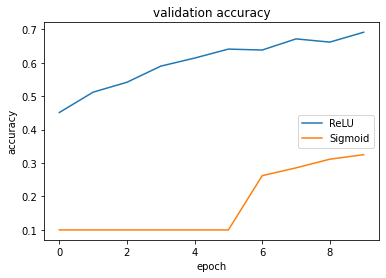

In [15]:
plt.plot(cnn_history.history['val_accuracy'])
plt.plot(cnn_sigmoid_history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='right')
plt.show()

Again, it is very obvious that the ReLU activation function works better than the sigmoid function in convolutional neural network since the accuracy for convolutional neural network with ReLU units is much higher that that with sigmoid units. ReLU function does not have the gradient vanishing problem as in sigmoid function, which leads to better convergence performance than sigmoid.

## Problem (c)
Compare the accuracy achieved with and without drop out as well as with and without data augmentation in the convolutional neural network in `cifar10 cnn.py`. 

1. **With drop out as well as with data augmentation**

In [12]:
cnn_dropout_dataaug = Sequential()
cnn_dropout_dataaug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_dropout_dataaug.add(Activation('relu'))
cnn_dropout_dataaug.add(Conv2D(32, (3, 3)))
cnn_dropout_dataaug.add(Activation('relu'))
cnn_dropout_dataaug.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout_dataaug.add(Dropout(0.25))

cnn_dropout_dataaug.add(Conv2D(64, (3, 3), padding='same'))
cnn_dropout_dataaug.add(Activation('relu'))
cnn_dropout_dataaug.add(Conv2D(64, (3, 3)))
cnn_dropout_dataaug.add(Activation('relu'))
cnn_dropout_dataaug.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout_dataaug.add(Dropout(0.25))

cnn_dropout_dataaug.add(Flatten())
cnn_dropout_dataaug.add(Dense(512))
cnn_dropout_dataaug.add(Activation('relu'))
cnn_dropout_dataaug.add(Dropout(0.5))
cnn_dropout_dataaug.add(Dense(num_classes))
cnn_dropout_dataaug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_dropout_dataaug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])




print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
cnn_dropout_dataaug_history = cnn_dropout_dataaug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=100,
                        validation_data=(x_test, y_test),
                        workers=4)



Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8525 - accuracy: 0.3163 - val_loss: 1.5640 - val_accuracy: 0.4311
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5543 - accuracy: 0.4321 - val_loss: 1.4147 - val_accuracy: 0.4845
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4487 - accuracy: 0.4745 - val_loss: 1.2845 - val_accuracy: 0.5391
Epoch 4/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3698 - accuracy: 0.5076 - val_loss: 1.2421 - val_accuracy: 0.5643
Epoch 5/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3031 - accuracy: 0.5350 - val_loss: 1.1237 - val_accuracy: 0.6019
Epoch 6/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2481 - accuracy: 0.5545 - val_loss: 1.1165 - val_accuracy: 0.6016
Epoch 7

2. **With drop out & without data augmentation**

In [13]:

cnn_dropout_nodataaug = Sequential()
cnn_dropout_nodataaug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_dropout_nodataaug.add(Activation('relu'))
cnn_dropout_nodataaug.add(Conv2D(32, (3, 3)))
cnn_dropout_nodataaug.add(Activation('relu'))
cnn_dropout_nodataaug.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout_nodataaug.add(Dropout(0.25))

cnn_dropout_nodataaug.add(Conv2D(64, (3, 3), padding='same'))
cnn_dropout_nodataaug.add(Activation('relu'))
cnn_dropout_nodataaug.add(Conv2D(64, (3, 3)))
cnn_dropout_nodataaug.add(Activation('relu'))
cnn_dropout_nodataaug.add(MaxPooling2D(pool_size=(2, 2)))
cnn_dropout_nodataaug.add(Dropout(0.25))

cnn_dropout_nodataaug.add(Flatten())
cnn_dropout_nodataaug.add(Dense(512))
cnn_dropout_nodataaug.add(Activation('relu'))
cnn_dropout_nodataaug.add(Dropout(0.5))
cnn_dropout_nodataaug.add(Dense(num_classes))
cnn_dropout_nodataaug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_dropout_nodataaug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Not using data augmentation.')
cnn_dropout_nodataaug_history = cnn_dropout_nodataaug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

   

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8223 - accuracy: 0.3322 - val_loss: 1.5989 - val_accuracy: 0.4163
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4844 - accuracy: 0.4644 - val_loss: 1.3269 - val_accuracy: 0.5215
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3439 - accuracy: 0.5170 - val_loss: 1.2139 - val_accuracy: 0.5694
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2458 - accuracy: 0.5564 - val_loss: 1.2104 - val_accuracy: 0.5683
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1701 - accuracy: 0.5856 - val_loss: 1.0811 - val_accuracy: 0.6201
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1013 - accuracy: 0.6115 - val_loss: 1.0205 - val_accuracy: 0.6402
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0507 - accuracy: 0.630

3. **Without drop out & with data augmentation**

In [14]:
cnn_nodropout_dataaug = Sequential()
cnn_nodropout_dataaug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_nodropout_dataaug.add(Activation('relu'))
cnn_nodropout_dataaug.add(Conv2D(32, (3, 3)))
cnn_nodropout_dataaug.add(Activation('relu'))
cnn_nodropout_dataaug.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

cnn_nodropout_dataaug.add(Conv2D(64, (3, 3), padding='same'))
cnn_nodropout_dataaug.add(Activation('relu'))
cnn_nodropout_dataaug.add(Conv2D(64, (3, 3)))
cnn_nodropout_dataaug.add(Activation('relu'))
cnn_nodropout_dataaug.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

cnn_nodropout_dataaug.add(Flatten())
cnn_nodropout_dataaug.add(Dense(512))
cnn_nodropout_dataaug.add(Activation('relu'))
#model.add(Dropout(0.5))
cnn_nodropout_dataaug.add(Dense(num_classes))
cnn_nodropout_dataaug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_nodropout_dataaug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
cnn_nodropout_dataaug_history = cnn_nodropout_dataaug.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=100,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7094 - accuracy: 0.3792 - val_loss: 1.4708 - val_accuracy: 0.4786
Epoch 2/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4540 - accuracy: 0.4777 - val_loss: 1.2896 - val_accuracy: 0.5390
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3313 - accuracy: 0.5256 - val_loss: 1.1950 - val_accuracy: 0.5712
Epoch 4/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2306 - accuracy: 0.5657 - val_loss: 1.1305 - val_accuracy: 0.6049
Epoch 5/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1530 - accuracy: 0.5934 - val_loss: 1.0767 - val_accuracy: 0.6232
Epoch 6/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0837 - accuracy: 0.6187 - val_loss: 1.0204 - val_accuracy: 0.6462
Epoch 7/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.03

4. **Without drop out & without data augmentation**

In [15]:
cnn_nodropout_nodataaug = Sequential()
cnn_nodropout_nodataaug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
cnn_nodropout_nodataaug.add(Activation('relu'))
cnn_nodropout_nodataaug.add(Conv2D(32, (3, 3)))
cnn_nodropout_nodataaug.add(Activation('relu'))
cnn_nodropout_nodataaug.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

cnn_nodropout_nodataaug.add(Conv2D(64, (3, 3), padding='same'))
cnn_nodropout_nodataaug.add(Activation('relu'))
cnn_nodropout_nodataaug.add(Conv2D(64, (3, 3)))
cnn_nodropout_nodataaug.add(Activation('relu'))
cnn_nodropout_nodataaug.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

cnn_nodropout_nodataaug.add(Flatten())
cnn_nodropout_nodataaug.add(Dense(512))
cnn_nodropout_nodataaug.add(Activation('relu'))
#model.add(Dropout(0.5))
cnn_nodropout_nodataaug.add(Dense(num_classes))
cnn_nodropout_nodataaug.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn_nodropout_nodataaug.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



print('Not using data augmentation.')
cnn_nodropout_nodataaug_history = cnn_nodropout_nodataaug.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)


Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6417 - accuracy: 0.4096 - val_loss: 1.4022 - val_accuracy: 0.4893
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3242 - accuracy: 0.5294 - val_loss: 1.2722 - val_accuracy: 0.5512
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1704 - accuracy: 0.5876 - val_loss: 1.1093 - val_accuracy: 0.6081
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0604 - accuracy: 0.6299 - val_loss: 1.1202 - val_accuracy: 0.6145
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9776 - accuracy: 0.6612 - val_loss: 1.0228 - val_accuracy: 0.6466
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9033 - accuracy: 0.6863 - val_loss: 0.9759 - val_accuracy: 0.6604
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8399 - accuracy: 0.711

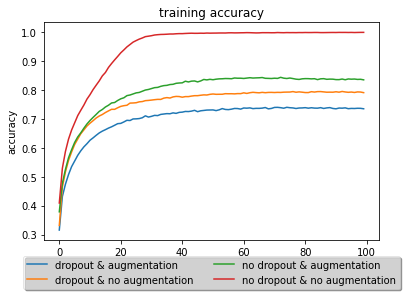

In [18]:
plt.plot(cnn_dropout_dataaug_history.history['accuracy'], label=f"dropout & augmentation")
plt.plot(cnn_dropout_nodataaug_history.history['accuracy'], label=f"dropout & no augmentation")
plt.plot(cnn_nodropout_dataaug_history.history['accuracy'], label=f"no dropout & augmentation")
plt.plot(cnn_nodropout_nodataaug_history.history['accuracy'], label=f"no dropout & no augmentation")
plt.title('training accuracy')
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

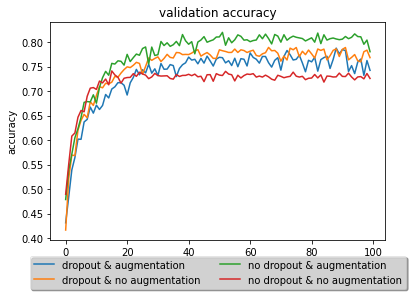

In [19]:
plt.plot(cnn_dropout_dataaug_history.history['val_accuracy'], label=f"dropout & augmentation")
plt.plot(cnn_dropout_nodataaug_history.history['val_accuracy'], label=f"dropout & no augmentation")
plt.plot(cnn_nodropout_dataaug_history.history['val_accuracy'], label=f"no dropout & augmentation")
plt.plot(cnn_nodropout_nodataaug_history.history['val_accuracy'], label=f"no dropout & no augmentation")
plt.title('validation accuracy')
plt.ylabel('accuracy')
leg = plt.legend(loc='upper center', ncol=2, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
leg.get_frame().set_alpha(0.5)
plt.show()

From the two figures above we can say that convolutional neural networks without dropout and data augmentation have higher trainging accuracy which is very close to 1 when epochs reach 100 but lower testing accuracy of 72%. While the trainging accuracy of convolutional neural networks with dropout and data augmentation is lower than the other three types of convolutional neural networks, the testing accuracy of those is around 75%. Also, it can be conclded that data augmentation is more useful in terms of avoiding overfitting than dropout in the sense that the convolutional neural networks with data augmentation alone give the highest testing accuracy of (about 80%) while having a trainging accuracy of around 80%.